# Logistic regression from scratch

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Logistic regression using scikit-learn : Digits dataset

In [2]:
# Loading the Digits Dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


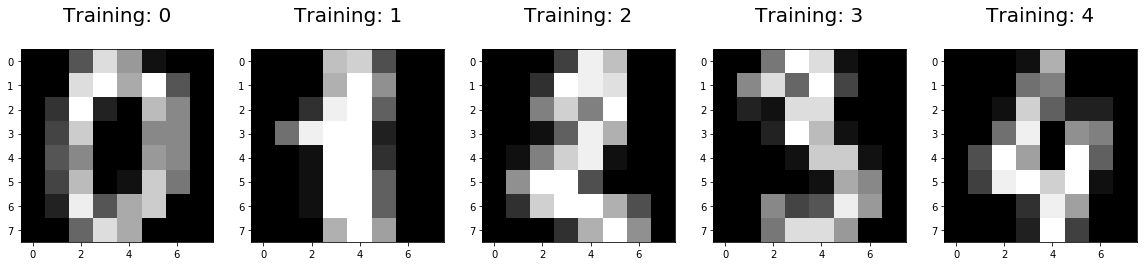

In [5]:
# Showing the Images and the Labels (Digits Dataset)
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [8]:
# Splitting Data into Training and Test Sets (Digits Dataset)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [11]:
# Model creation and training
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [12]:
logisticRegr.fit(x_train, y_train)

/Users/noor-4785/vpython3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noor-4785/vpython3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
#  Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [14]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [16]:
# Measuring Model Performance (Digits Dataset)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [17]:
# Confusion Matrix (Digits Dataset)
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


# Logistic regression using scikit-learn : diabetes dataset

## Import necessary libraries

In [18]:
import numpy
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Load and explore data

In [19]:
dataset=pd.read_csv("data/pima-indians-diabetes-data.csv")

In [20]:
dataset.head()

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
dataset.describe(include='all')

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Prepare training and testing data

In [22]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['diabetes'])

#check that the target variable has been removed
X.head()

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
#one-hot encode target column
Y = pd.get_dummies(dataset.diabetes, drop_first=True)

# Y

In [24]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

In [25]:
print("Number of data in training set ",len(trainX), len(trainY))
print("Number of data in tesing set ",len(testX), len(testY))

Number of data in training set  576 576
Number of data in tesing set  192 192


## Model building

In [26]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LogisticRegression()
# 2. Use fit
model.fit(trainX, trainY)
# 3. Check the score
model.score(testX, testY)

/Users/noor-4785/vpython3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noor-4785/vpython3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7447916666666666

In [27]:
predY = model.predict(testX)

In [29]:
testX

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
204,6,103,72,32,190,37.7,0.324,55
97,1,71,48,18,76,20.4,0.323,22
336,0,117,0,0,0,33.8,0.932,44
568,4,154,72,29,126,31.3,0.338,37
148,5,147,78,0,0,33.7,0.218,65


## Save and Load the model / Prediction

In [30]:
import pickle

In [31]:
# save the model to disk
filename = 'logr_model'
pickle.dump(model, open(filename, 'wb'))

In [32]:
Xnew = [[6, 98, 58, 33, 190, 34.0, 0.430, 43]]
ynew = model.predict(Xnew)
ynew

array([0], dtype=uint8)

In [33]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [34]:
ynew = loaded_model.predict(Xnew)
ynew

array([0], dtype=uint8)